In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [14]:
test = pd.read_csv("/content/drive/MyDrive/ML/datasets/regression/test.csv")
#test = pd.read_csv("/content/drive/MyDrive/Player Transfer Value/test(1).csv")

train = pd.read_csv("/content/drive/MyDrive/ML/datasets/regression/train.csv")
#train = pd.read_csv("/content/drive/MyDrive/Player Transfer Value/train(1).csv")

pd.set_option('display.max_columns', None)
train.head()

,id,Name,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,Expected Goal Contributions,Interceptions,Open Play Goals,Open Play Expected Goals,Percentage of Passes Completed,Progressive Passes Rec,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,Value at beginning of 2023/24 season
0,917,Lassine Sinayoko,1.3,23,0.11,3.68,31.8,0.69,0.97,Mali,0.16,1.1,0.06,0.20,74.4,8.60,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.8,1.3,1.2
1,432,Emil Ceide,0.2,21,0.17,3.49,29.5,0.52,0.00,Norway,0.25,0.2,0.00,0.16,72.8,8.21,3.32,6.47,1.75,1.40,6.82,0.87,0.4,NaN,1.0,2.5
2,948,Linton Maina,0.0,24,0.28,2.99,27.5,0.76,0.36,Germany,0.26,0.2,0.12,0.20,69.3,6.95,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.5,1.8,6.0
3,989,Luis Javier Suarez,2.1,25,0.24,2.44,23.5,0.76,0.81,Colombia,0.14,0.3,0.33,0.39,68.5,5.46,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.0,9.0,8.0
4,887,Kim Min-jae,2.9,26,0.05,1.19,80.4,1.06,3.64,NaN,0.04,1.5,0.05,0.02,90.2,0.19,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.5,9.0,60.0


the diffrent columns between test and train

remove name column

In [15]:
print('train: ',list(train.columns.values))
train = train.drop(['Name','Country'], axis=1)
print('new train',list(train.columns.values))

print('test: ',list(test.columns.values))
test = test.drop(['Country'], axis=1)
print('new test',list(test.columns.values))

train:  ['id', 'Name', 'Aerial Duels won', 'Age', 'Assists', 'Attacking options created', 'Attempted Passes', 'Blocks', 'Clearances', 'Country', 'Expected Goal Contributions', 'Interceptions', 'Open Play Goals', 'Open Play Expected Goals', 'Percentage of Passes Completed', 'Progressive Passes Rec', 'Progressive Passes', 'Progressive Carries', 'Shots', 'Successful Dribbles', 'Touches in attacking penalty area', 'Tackles', 'Value at beginning of 2020/21 season', 'Value at beginning of 2021/22 season', 'Value at beginning of 2022/23 season', 'Value at beginning of 2023/24 season']
new train ['id', 'Aerial Duels won', 'Age', 'Assists', 'Attacking options created', 'Attempted Passes', 'Blocks', 'Clearances', 'Expected Goal Contributions', 'Interceptions', 'Open Play Goals', 'Open Play Expected Goals', 'Percentage of Passes Completed', 'Progressive Passes Rec', 'Progressive Passes', 'Progressive Carries', 'Shots', 'Successful Dribbles', 'Touches in attacking penalty area', 'Tackles', 'Value 

In [17]:
on = ['Value at beginning of 2020/21 season', 'Value at beginning of 2021/22 season', 'Value at beginning of 2022/23 season', 'Value at beginning of 2023/24 season']
on2 = ['Value at beginning of 2020/21 season', 'Value at beginning of 2021/22 season', 'Value at beginning of 2022/23 season']

print('is the tain have null: \n'+ str(train[on].isnull().sum()))
print('is the test have null: \n'+ str(test[on2].isnull().sum()))

is the tain have null: 
Value at beginning of 2020/21 season    74
Value at beginning of 2021/22 season    30
Value at beginning of 2022/23 season     5
Value at beginning of 2023/24 season     0
dtype: int64
is the test have null: 
Value at beginning of 2020/21 season    25
Value at beginning of 2021/22 season    10
Value at beginning of 2022/23 season     0
dtype: int64


## fill null values with avg

In [18]:
train_means = train[["Value at beginning of 2020/21 season", "Value at beginning of 2021/22 season", "Value at beginning of 2022/23 season", "Value at beginning of 2023/24 season"]].mean(axis = 1, skipna = True)
test_means = test[["Value at beginning of 2020/21 season", "Value at beginning of 2021/22 season", "Value at beginning of 2022/23 season"]].mean(axis = 1, skipna = True)

In [19]:
train = train.apply(lambda row: row.fillna(train_means[row.name]), axis = 1)
train.head(10)

,id,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Expected Goal Contributions,Interceptions,Open Play Goals,Open Play Expected Goals,Percentage of Passes Completed,Progressive Passes Rec,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,Value at beginning of 2023/24 season
0,917.0,1.3,23.0,0.11,3.68,31.8,0.69,0.97,0.16,1.1,0.06,0.20,74.4,8.60,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.8,1.3,1.2
1,432.0,0.2,21.0,0.17,3.49,29.5,0.52,0.00,0.25,0.2,0.00,0.16,72.8,8.21,3.32,6.47,1.75,1.40,6.82,0.87,0.4,1.3,1.0,2.5
2,948.0,0.0,24.0,0.28,2.99,27.5,0.76,0.36,0.26,0.2,0.12,0.20,69.3,6.95,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.5,1.8,6.0
3,989.0,2.1,25.0,0.24,2.44,23.5,0.76,0.81,0.14,0.3,0.33,0.39,68.5,5.46,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.0,9.0,8.0
4,887.0,2.9,26.0,0.05,1.19,80.4,1.06,3.64,0.04,1.5,0.05,0.02,90.2,0.19,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.5,9.0,60.0
5,983.0,0.1,32.0,0.13,3.44,73.2,0.74,1.14,0.16,0.7,0.27,0.15,87.0,10.97,3.95,2.61,0.94,1.07,3.41,2.54,10.0,12.0,12.0,8.0
6,1531.0,1.3,18.0,0.00,2.08,47.3,0.99,0.57,0.06,1.5,0.14,0.12,77.8,0.28,4.25,1.42,1.13,1.13,0.71,2.13,7.0,7.0,1.0,13.0
7,1125.0,0.7,32.0,0.10,2.73,41.6,1.27,1.85,0.15,1.1,0.03,0.08,76.5,1.88,3.67,1.20,1.07,0.91,0.68,1.33,3.0,1.6,1.0,1.3
8,277.0,0.9,29.0,0.15,1.71,41.5,1.63,2.09,0.17,1.8,0.05,0.09,74.9,0.41,3.73,0.20,0.97,0.41,2.14,2.65,4.0,8.0,10.0,16.0
9,1318.0,0.2,20.0,0.04,4.22,65.4,1.27,0.34,0.24,0.7,0.22,0.25,86.4,4.99,8.15,3.09,1.08,1.64,2.64,1.71,30.0,80.0,80.0,100.0


In [20]:
test = test.apply(lambda row: row.fillna(test_means[row.name]), axis = 1)
test.head(10)

,id,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Expected Goal Contributions,Interceptions,Open Play Goals,Open Play Expected Goals,Percentage of Passes Completed,Progressive Passes Rec,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season
0,705.0,2.6,28.0,0.03,0.95,47.2,1.13,3.44,0.01,2.0,0.00,0.03,83.2,0.69,4.04,0.58,0.35,0.32,0.95,1.53,2.5,3.0,4.0
1,809.0,0.3,28.0,0.10,3.22,50.5,0.79,1.73,0.18,0.8,0.15,0.07,71.1,3.62,3.96,1.78,0.69,0.74,0.84,1.34,1.7,4.0,7.0
2,1432.0,0.7,26.0,0.03,2.34,47.5,1.08,1.56,0.08,1.7,0.03,0.06,88.7,1.22,5.72,2.00,0.81,1.69,0.64,1.49,1.2,3.0,3.5
3,173.0,1.6,26.0,0.12,1.98,50.2,1.40,2.32,0.22,0.6,0.18,0.05,74.5,7.50,3.11,3.05,0.55,0.61,2.87,2.32,4.8,3.5,3.0
4,513.0,0.4,30.0,0.38,5.12,46.3,1.04,1.15,0.35,1.3,0.12,0.16,62.9,5.64,6.10,2.46,1.96,1.27,1.73,0.81,4.0,3.5,3.5
5,1649.0,0.3,17.0,0.00,2.15,58.9,0.98,1.51,0.05,1.1,0.18,0.14,90.8,5.42,3.11,2.22,0.80,1.60,1.96,1.69,5.0,5.0,5.0
6,818.0,1.2,23.0,0.22,2.30,52.2,1.16,3.36,0.18,1.0,0.13,0.14,71.9,5.64,4.03,1.88,1.12,0.58,2.06,1.52,4.0,6.0,5.0
7,261.0,1.7,26.0,0.00,1.97,35.5,1.34,1.30,0.04,0.9,0.04,0.07,77.3,2.21,3.77,0.65,0.83,0.15,1.59,1.99,0.7,2.0,2.5
8,405.0,2.0,25.0,0.00,0.68,61.8,2.03,3.68,0.02,1.4,0.16,0.09,87.8,0.50,3.00,0.91,0.68,0.37,0.99,1.46,40.0,60.0,60.0
9,1399.0,1.9,28.0,0.05,1.65,53.5,1.28,1.87,0.05,1.5,0.08,0.07,84.0,0.29,3.52,0.59,1.07,0.24,0.77,2.21,4.0,11.0,13.0


In [21]:
print(test.shape)
new_column_data = [0] * 409
test['Value at beginning of 2023/24 season'] = new_column_data
(train.shape,test.shape)

(409, 23)


((1293, 24), (409, 24))

In [22]:
headers_to_standardize = ['Aerial Duels won', 'Age', 'Assists', 'Attacking options created', 'Attempted Passes', 'Blocks', 'Clearances', 'Expected Goal Contributions', 'Interceptions', 'Open Play Goals', 'Open Play Expected Goals', 'Percentage of Passes Completed', 'Progressive Passes Rec', 'Progressive Passes', 'Progressive Carries', 'Shots', 'Successful Dribbles', 'Touches in attacking penalty area', 'Tackles','Value at beginning of 2020/21 season', 'Value at beginning of 2021/22 season', 'Value at beginning of 2022/23 season','Value at beginning of 2023/24 season']
mean = train[headers_to_standardize].mean()
deviation = train[headers_to_standardize].std()

In [23]:
train[headers_to_standardize] = (train[headers_to_standardize] - mean ) / deviation
test[headers_to_standardize] = (test[headers_to_standardize]-mean) / deviation

In [24]:
train['id'] = [int(i) for i in train['id']]
test['id'] = [int(i) for i in test['id']]

In [ ]:
train.head(10)

In [26]:
random_seed = 79
validation_fraction = 0.20
print(train.shape)

train, validation = train_test_split(train, test_size=validation_fraction, random_state=random_seed)
print(train.shape,validation.shape)

(1293, 24)
(1034, 24) (259, 24)


In [27]:
train_x = train.drop("Value at beginning of 2023/24 season",axis=1)
train_y = train['Value at beginning of 2023/24 season']
validation_x = validation.drop("Value at beginning of 2023/24 season",axis=1)
validation_y = validation['Value at beginning of 2023/24 season']
test_x = test.drop("Value at beginning of 2023/24 season",axis=1)

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_x.drop(columns = 'id'), train_y)

RandomForestRegressor(random_state=42)

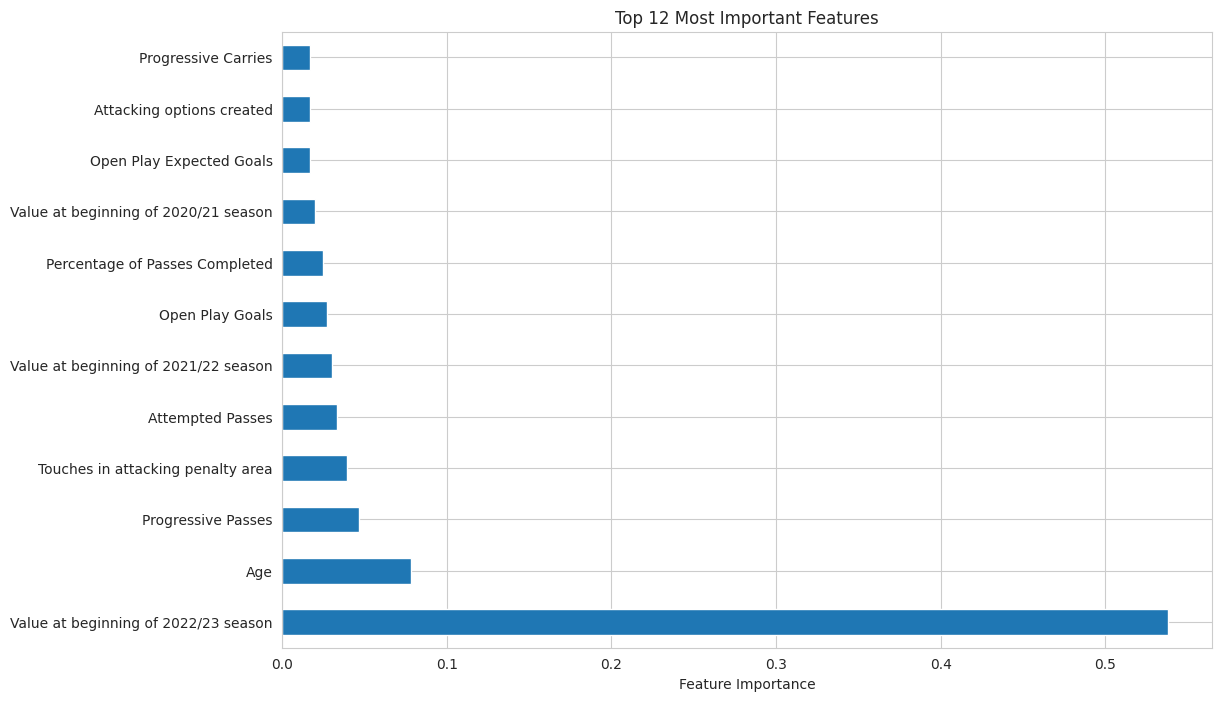

In [29]:
feature_importance = pd.Series(rf.feature_importances_, index= train_x.drop(columns = 'id').columns)
plt.figure(figsize=(12, 8))
feature_importance.nlargest(12).plot(kind='barh')
plt.title('Top 12 Most Important Features')
plt.xlabel('Feature Importance')
plt.show()

In [33]:
# selected_features = feature_importance.nlargest(12).index.tolist()
# selected_features

selected_features = [
 'Value at beginning of 2022/23 season',
 'Age',
 'Progressive Passes',
 'Touches in attacking penalty area',
 'Attempted Passes',
 'Value at beginning of 2021/22 season',
 'Open Play Goals',
 'Percentage of Passes Completed',
 'Value at beginning of 2020/21 season',
 'Open Play Expected Goals',
 'Attacking options created',
 'Progressive Carries']

In [39]:
X_train_selected = train_x[selected_features]
X_validation_selected = validation_x[selected_features]
X_test_selected = test_x[selected_features]

##Bootstrap Sampling

In [35]:
from sklearn.utils import resample

X = X_train_selected

num_samples = 10

augmented_datasets = []
#augmented_datasets = pd.dataFrame(augmented_datasets)
for _ in range(num_samples):
    bootstrap_sample = resample(X)
    augmented_datasets.append(bootstrap_sample)

In [36]:
#type(augmented_datasets)
#augmented_dataset = train.copy()
for i in range(len(augmented_datasets)):
 X_train_selected = pd.concat([train, augmented_datasets[i]],ignore_index = True)


In [37]:
X_train_selected.shape

(2068, 24)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR

X_train_h = X_train_selected.iloc[:, 1:].values
X_test_h = X_test_selected.iloc[:, 1:].values
print(X_train_h.shape)


model = LinearRegression()

model.fit(X_train_h, train_y)
predictions = model.predict(X_test_h)
predictions2 = model.predict(X_train_h)

mse = mean_squared_error(train_y, predictions2)
print("Mean Squared Error:", mse)

(1034, 11)
Mean Squared Error: 0.3507823053786353


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier

X_train_h = X_train_selected.iloc[:, 1:].values
X_test_h = X_test_selected.iloc[:, 1:].values
print(X_train_h.shape)

#model= SVR(kernel='linear', C=1.0)
#model = LinearRegression()
model = DecisionTreeClassifier()


model.fit(X_train_h, train_y)
predictions = model.predict(X_test_h)
predictions2 = model.predict(X_train_h)

mse = mean_squared_error(train_y, predictions2)
print("Mean Squared Error:", mse)

(14223, 12)
Mean Squared Error: 0.26837498080550065


In [ ]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

In [ ]:
epochs = 300
batch_size = 32

history = model.fit(
    [X_train_selected.iloc[:, 1:4],X_train_selected.iloc[:, 4:]],
    train_y,
    epochs=epochs,
    batch_size=batch_size,
    callbacks = early_stopping
)

# Evaluate the model's performance on the validation set
#val_loss, val_mse = model.evaluate([X_validation_selected.iloc[:,1:]],validation_y,verbose=0)

#val_loss, val_mse = model.evaluate([X_validation_selected.iloc[:, 1:4], X_validation_selected.iloc[:, 4:]], validation_y, verbose=0)
#val_loss, val_mse = model.evaluate([X_validation_selected.iloc[:, 1:2],X_validation_selected.iloc[:, 2:4], X_validation_selected.iloc[:, 4:]], validation_y, verbose=0)
#print(f"Validation Loss: {val_loss:.4f}, Validation MSE: {val_mse:.4f}")

In [ ]:
predictions = predictions.flatten()
validation_y = np.array(validation_y)
y_true = validation_y.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_true, predictions, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")

plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red', linewidth=2)

plt.show()

In [ ]:
X_test_h

array([[-0.50832524,  0.29328143,  0.22040278, ..., -1.05934682,
        -0.82474432, -0.74446387],
       [-0.32758786,  0.29328143,  0.17406538, ..., -0.11736456,
        -0.5459484 , -0.21696126],
       [-0.53844814, -0.17749807,  1.19348817, ..., -0.88895412,
        -0.61564738,  0.9761994 ],
       ...,
       [-0.29746496,  1.47023019, -0.12712771, ..., -1.16544038,
        -0.5459484 , -0.84494055],
       [-0.56857103, -0.17749807, -0.53257996, ...,  1.41938465,
         0.36013835,  0.59941182],
       [-0.14685048, -0.41288783, -0.72372173, ..., -1.25224421,
        -0.68534636, -0.78214262]])

In [ ]:
result = test.copy()
#result["Value at beginning of 2023/24 season"] = model.predict([X_test_selected.iloc[:, 1:4],X_test_selected.iloc[:, 4:]])
result["Value at beginning of 2023/24 season"] = predictions
#result["Value at beginning of 2023/24 season"] = model.predict(X_test_h)
result[headers_to_standardize] = (result[headers_to_standardize] * deviation) + mean

In [ ]:
result

In [ ]:
#result = result[['id','Value at beginning of 2023/24 season']].copy()
result = result[['id','Value at beginning of 2023/24 season']].copy()

result.rename(columns={'Value at beginning of 2023/24 season': 'Label'},inplace=True)
result['Label'] = [abs(i) for i in result['Label']]


In [ ]:
result

,id,Label
0,705,5.446457
1,809,11.023130
2,1432,7.918447
3,173,11.153872
4,513,2.549499
...,...,...
404,1220,2.707949
405,478,2.717205
406,798,9.085475
407,1563,1.945355


In [ ]:
result.to_csv('final_predictions_AHHHHHHHHH.csv',index=False)
#result.to_csv('/content/drive/MyDrive/Player Transfer Value/final_Predictions_0.29.csv',index=False)

In [ ]:
model.save('/content/drive/MyDrive/regression/final_model_100%_data.keras')